# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv("train_house.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Drop variabel NaN
total = house.isnull().sum().sort_values(ascending=False)
percent = house.isnull().sum() / house.isnull().count().sort_values(ascending=False)
miss_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
miss_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [18]:
house = house.dropna(axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
# Memisahkan data menjadi numerikal & kategorikal

# data numerikal
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
# data kategorikal
house_cat = house.drop(num_cols, axis=1)
house_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [21]:
# menyimpan data yang telah di eksplorasi
house_numeric.to_csv("house_numeric.csv")
house_cat.to_csv("house_cat.csv")

# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

<Axes: xlabel='Utilities', ylabel='proportion'>

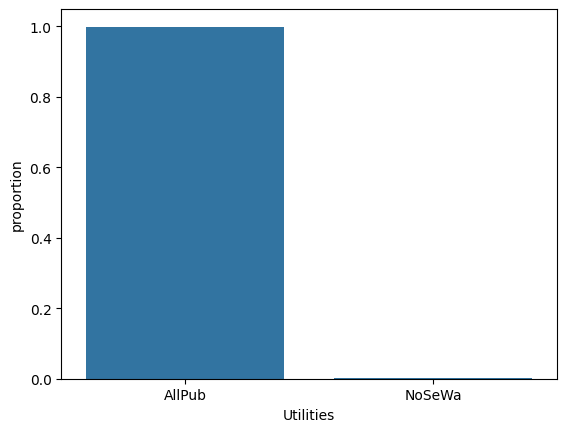

In [25]:
sns.barplot(
    x=house_cat["Utilities"].value_counts().index,
    y=house_cat["Utilities"].value_counts(normalize=True),
)

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: xlabel='HouseStyle', ylabel='proportion'>

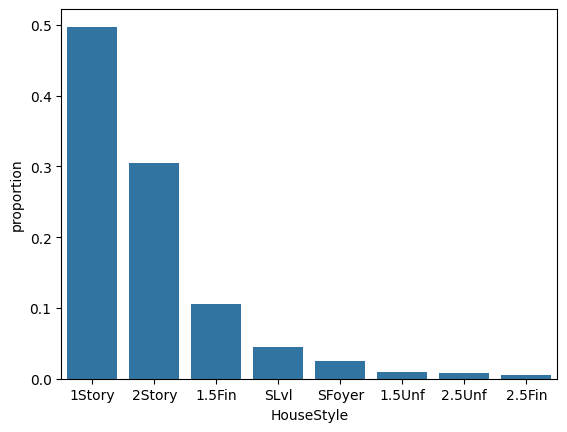

In [26]:
sns.barplot(
    x=house_cat["HouseStyle"].value_counts().index,
    y=house_cat["HouseStyle"].value_counts(normalize=True),
)

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

<Axes: xlabel='ExterQual', ylabel='proportion'>

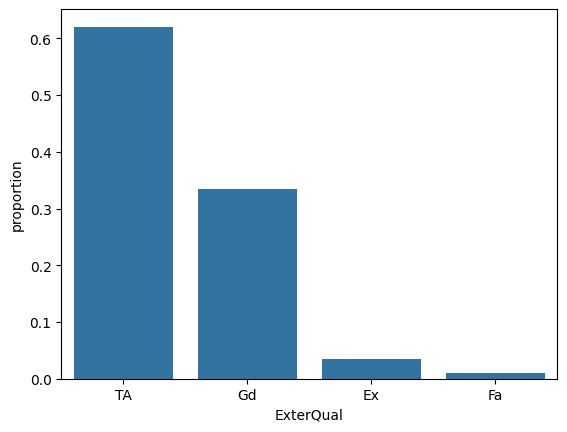

In [27]:
sns.barplot(
    x=house_cat["ExterQual"].value_counts().index,
    y=house_cat["ExterQual"].value_counts(normalize=True),
)

#### **Analisis tentang variabel kategorikal**

* Mayoritas rumah sudah full fasilitas
* Rumah satu lantai paling banyak tersedia
* Kualitas rumah rata-rata dan sedikit yang bagus

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

median:  163000.0
mean:  180921.19589041095
Std Dev:  79442.50288288662


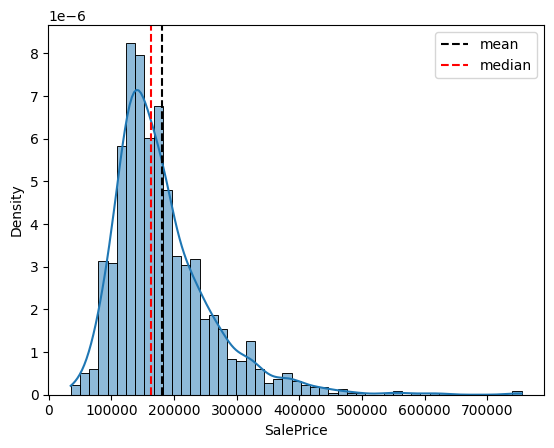

In [29]:
x = house_numeric["SalePrice"]
sns.histplot(house_numeric["SalePrice"], kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)


# Median
print("median: ", x.median())

# Mean
print("mean: ", x.mean())

# Std Dev
print("Std Dev: ", x.std())

plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Harga rata-rata rumah sebesar 180921.19
* Harga rumah paling banyak sebesar 163000.0

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

median:  1464.0
mean:  1515.463698630137
Std Dev:  525.4803834232025


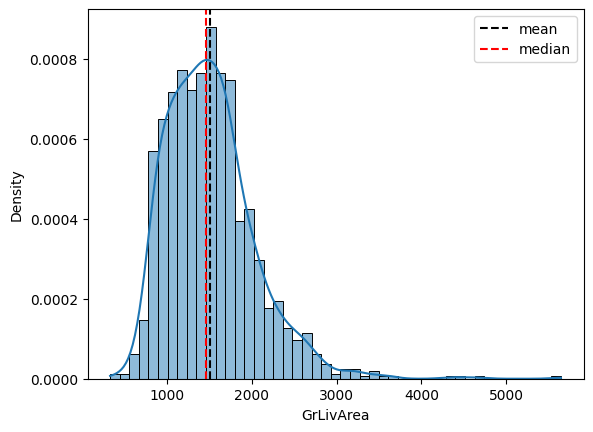

number of non-zero values:  1460
number of zero values:  0


In [31]:
x = house_numeric["GrLivArea"]
sns.histplot(house_numeric["GrLivArea"], kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)

# Median
print("median: ", x.median())

# Mean
print("mean: ", x.mean())

# Std Dev
print("Std Dev: ", x.std())

plt.show()

print("number of non-zero values: ", np.sum(house_numeric["GrLivArea"] != 0))
print("number of zero values: ", np.sum(house_numeric["GrLivArea"] == 0))

#### **Analisis tentang variabel `GrlivArea`**

* Rata-rata luas rumah sebesar 1515.6 square feet
* Rumah paling banyak adalah rumah dengan luas 1464 square feet
* Data imbalanced

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

median:  480.0
mean:  472.9801369863014
Std Dev:  213.80484145338042


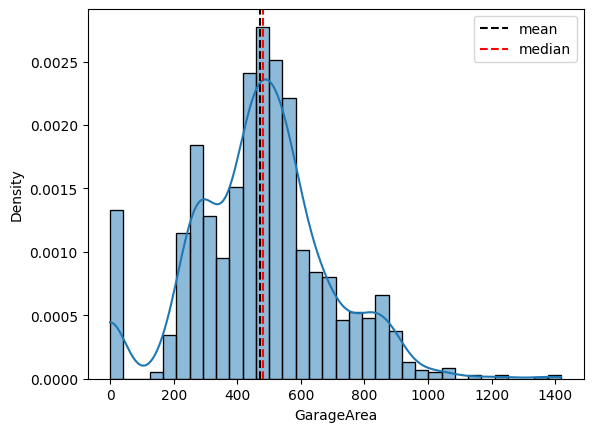

Jumlah nilai tidak nol:  1379
Jumlah nilai nol:  81


In [35]:
x = house_numeric["GarageArea"]
sns.histplot(x, kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)

# Median
print("median: ", x.median())

# Mean
print("mean: ", x.mean())

# Std Dev
print("Std Dev: ", x.std())

plt.show()

print("Jumlah nilai tidak nol: ", np.sum(x != 0))
print("Jumlah nilai nol: ", np.sum(x == 0))

#### **Analisis tentang variabel `GarageArea`**

* Rata-rata luas garasi rumah adalah 472.98 square feet
* Luas garasi rumah paling banyak tersedia adalah 480 square feet
* Data imbalanced

### PoolArea

median:  0.0
mean:  2.758904109589041
Std Dev:  40.17730694453019
jumlah nilai tidak nol:  7
jumlah nilai nol:  1453


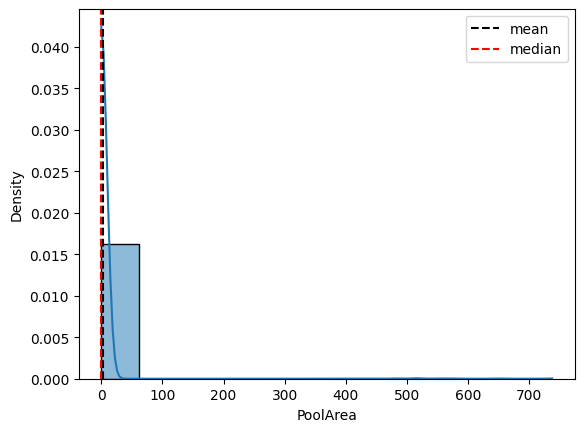

In [47]:
x = house_numeric["PoolArea"]
sns.histplot(x, kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)

print("median: ", x.median())
print("mean: ", x.mean())
print("Std Dev: ", x.std())
plt.show

print("jumlah nilai tidak nol: ", np.sum(x != 0))
print("jumlah nilai nol: ", np.sum(x == 0))

## Pemrosesan Data Variabel Numerikal

median:  5.212187604403958
mean:  5.221978956475628
Std Dev:  0.17347974217176834


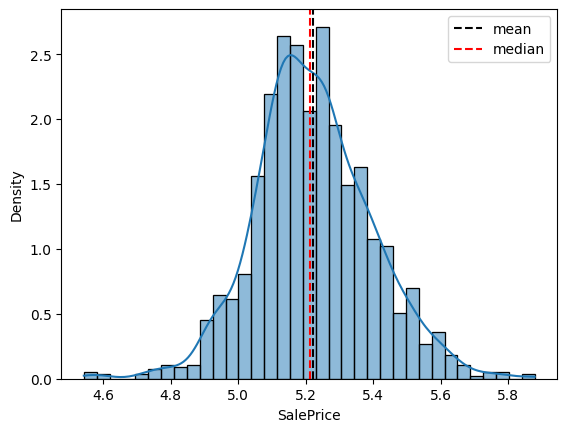

In [37]:
# Transformasi log-10 SalePrice

x = np.log10(house_numeric["SalePrice"])
sns.histplot(x, kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
# Median
print("median: ", x.median())
# Mean
print("mean: ", x.mean())
# Std Dev
print("Std Dev: ", x.std())

plt.show()

median:  3.165541076722373
mean:  3.156354310389778
Std Dev:  0.14485910869663862


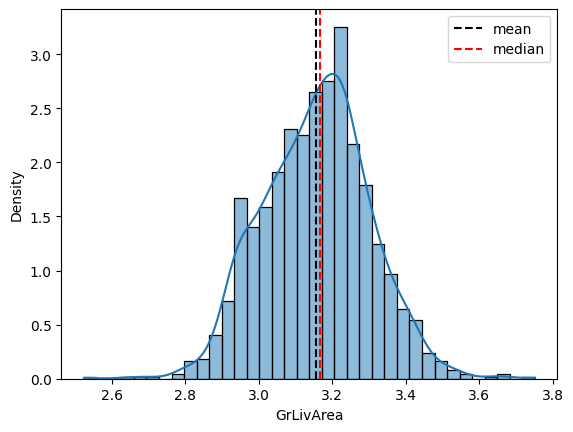

In [39]:
# Transformasi log-10 GrLivArea

x = np.log10(house_numeric["GrLivArea"])
sns.histplot(x, kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
# Median
print("median: ", x.median())
# Mean
print("mean: ", x.mean())
# Std Dev
print("Std Dev: ", x.std())

plt.show()

median:  484.0
mean:  500.76214648295866
Std Dev:  185.68051979433164


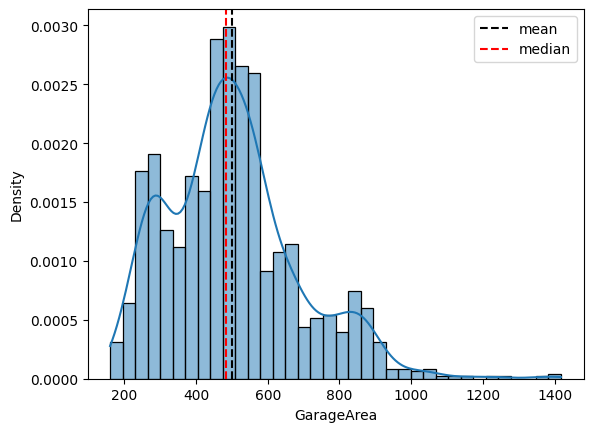

Jumlah nilai tidak nol:  1379
Jumlah nilai nol:  0


In [40]:
# Menghilangkan nilai nol pada GarageArea

# membuat kluster dari data GarageArea, kluster yg memiliki garasai dan tanpa memiliki garasi
x = house_numeric["GarageArea"][house_numeric["GarageArea"] != 0]
sns.histplot(x, kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
# Median
print("median: ", x.median())
# Mean
print("mean: ", x.mean())
# Std Dev
print("Std Dev: ", x.std())

plt.show()

print("Jumlah nilai tidak nol: ", np.sum(x != 0))
print("Jumlah nilai nol: ", np.sum(x == 0))

median:  555.0
mean:  575.4285714285714
Std Dev:  89.84033456240974
jumlah nilai tidak nol:  7
jumlah nilai nol:  0


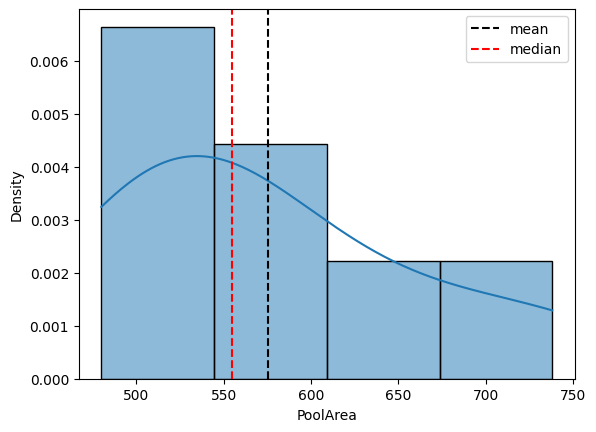

In [48]:
# Menghilangkan nilai nol pada PoolArea

# membuat kluster dari data Poolarea, kluster yg memiliki pool dan tidak memilik pool

x = house_numeric["PoolArea"][house_numeric["PoolArea"] != 0]
sns.histplot(x, kde=True, stat="density")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)

print("median: ", x.median())
print("mean: ", x.mean())
print("Std Dev: ", x.std())
plt.show

print("jumlah nilai tidak nol: ", np.sum(x != 0))
print("jumlah nilai nol: ", np.sum(x == 0))

#### **Penjelasan dan analisis tentang pemrosesan data**

* Data menjadi balanced

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

<function matplotlib.pyplot.show(close=None, block=None)>

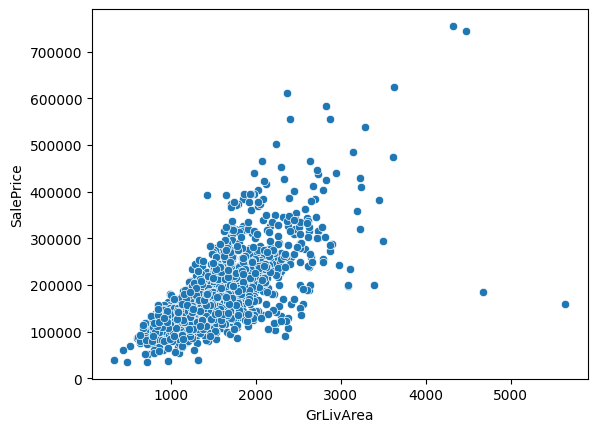

In [43]:
ax = sns.scatterplot(x="GrLivArea", y="SalePrice", data=house_numeric)
plt.show

# `GarageArea` dengan `SalePrice`

<function matplotlib.pyplot.show(close=None, block=None)>

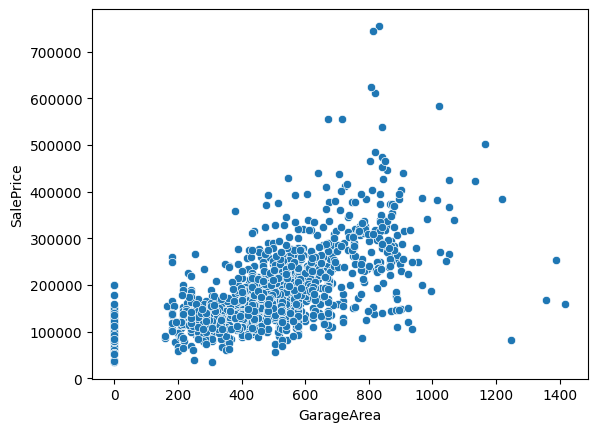

In [44]:
ax = sns.scatterplot(x="GarageArea", y="SalePrice", data=house_numeric)
plt.show

#### **Hipotesis tentang hubungan antar-variabel**

* Hubungan korelasi positif antara luas area dengan harga penjualan, namun ada anomali data pada sebelah kanan data
* Hubungan korelasi positif antara luas garasi dengan harga penjualan, naun ada anomali pada sebelah kiri data dan sebelah kanan data